In [33]:
import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

C:\Users\manue\PycharmProjects\Data6Ex2\.venv\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [34]:
X.isna().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [35]:
print(X.head())

              race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  ...  examide  citoglipton  insulin  \
0  Pediatrics-Endocrinology  ...       No           No 

In [36]:
print(X.describe())

       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101766.000000             101766.000000        101766.000000   
mean            2.024006                  3.715642             5.754437   
std             1.445403                  5.280166             4.064081   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362        1.705807         8.127566   
min 

In [37]:
print(X.dtypes)

race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

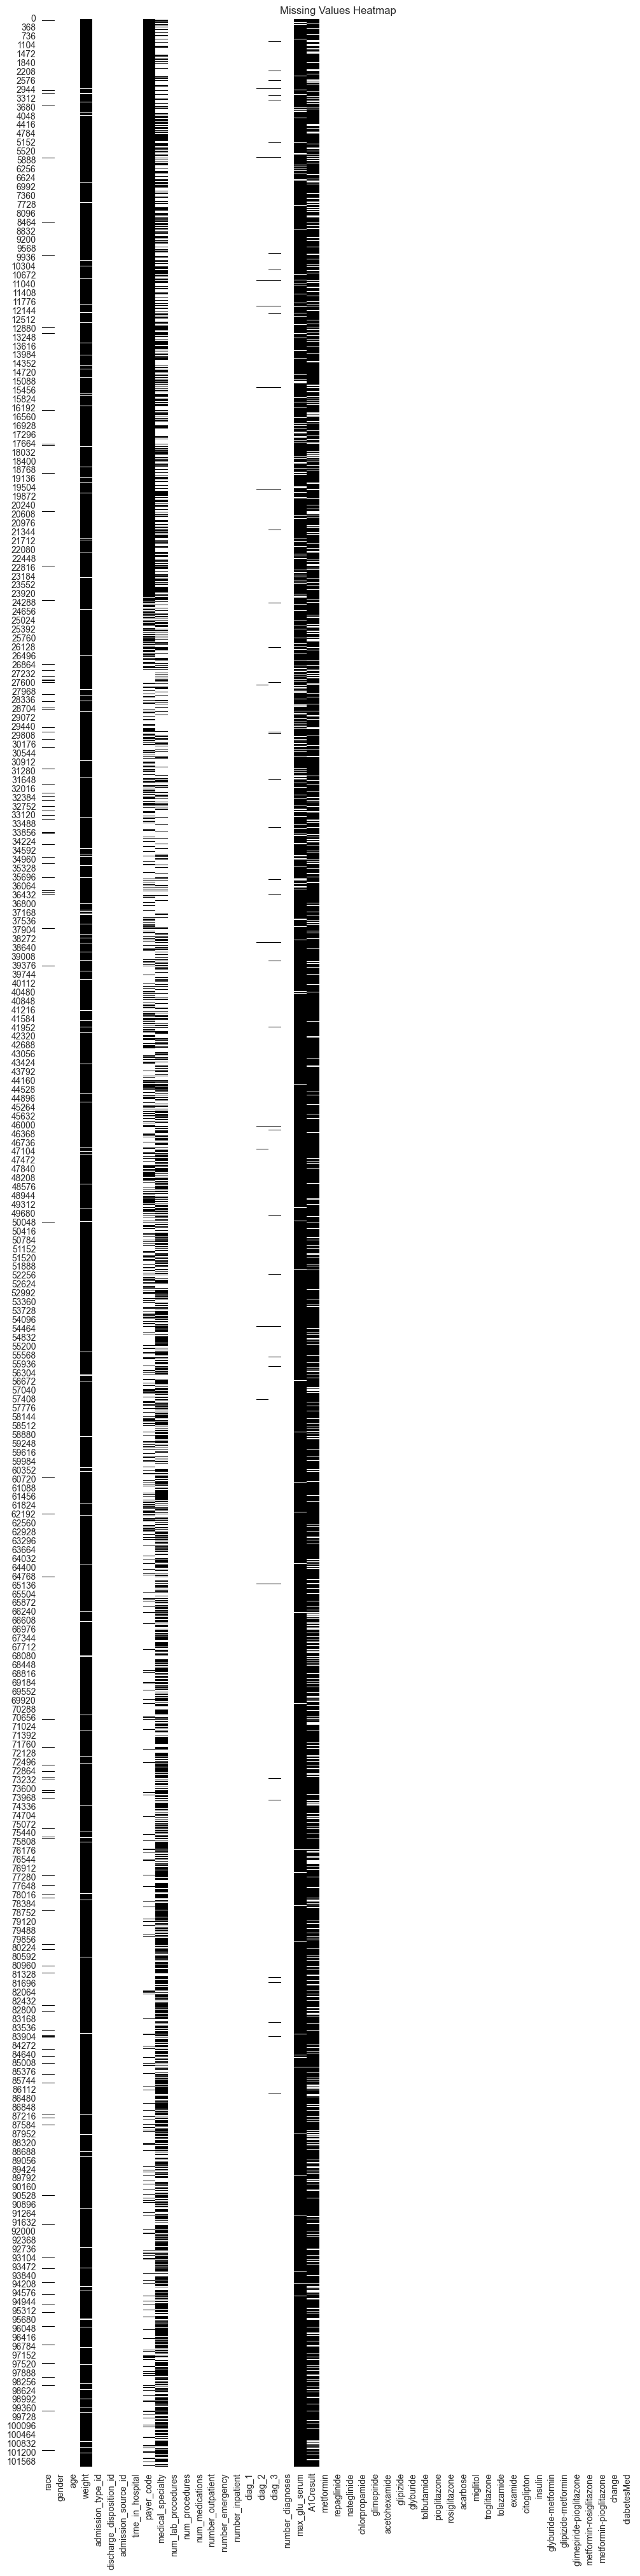

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 50))
sns.heatmap(X.isna(), cbar=False, cmap="Greys") 
plt.title('Missing Values Heatmap')
plt.show()
# Missing values are marked in white

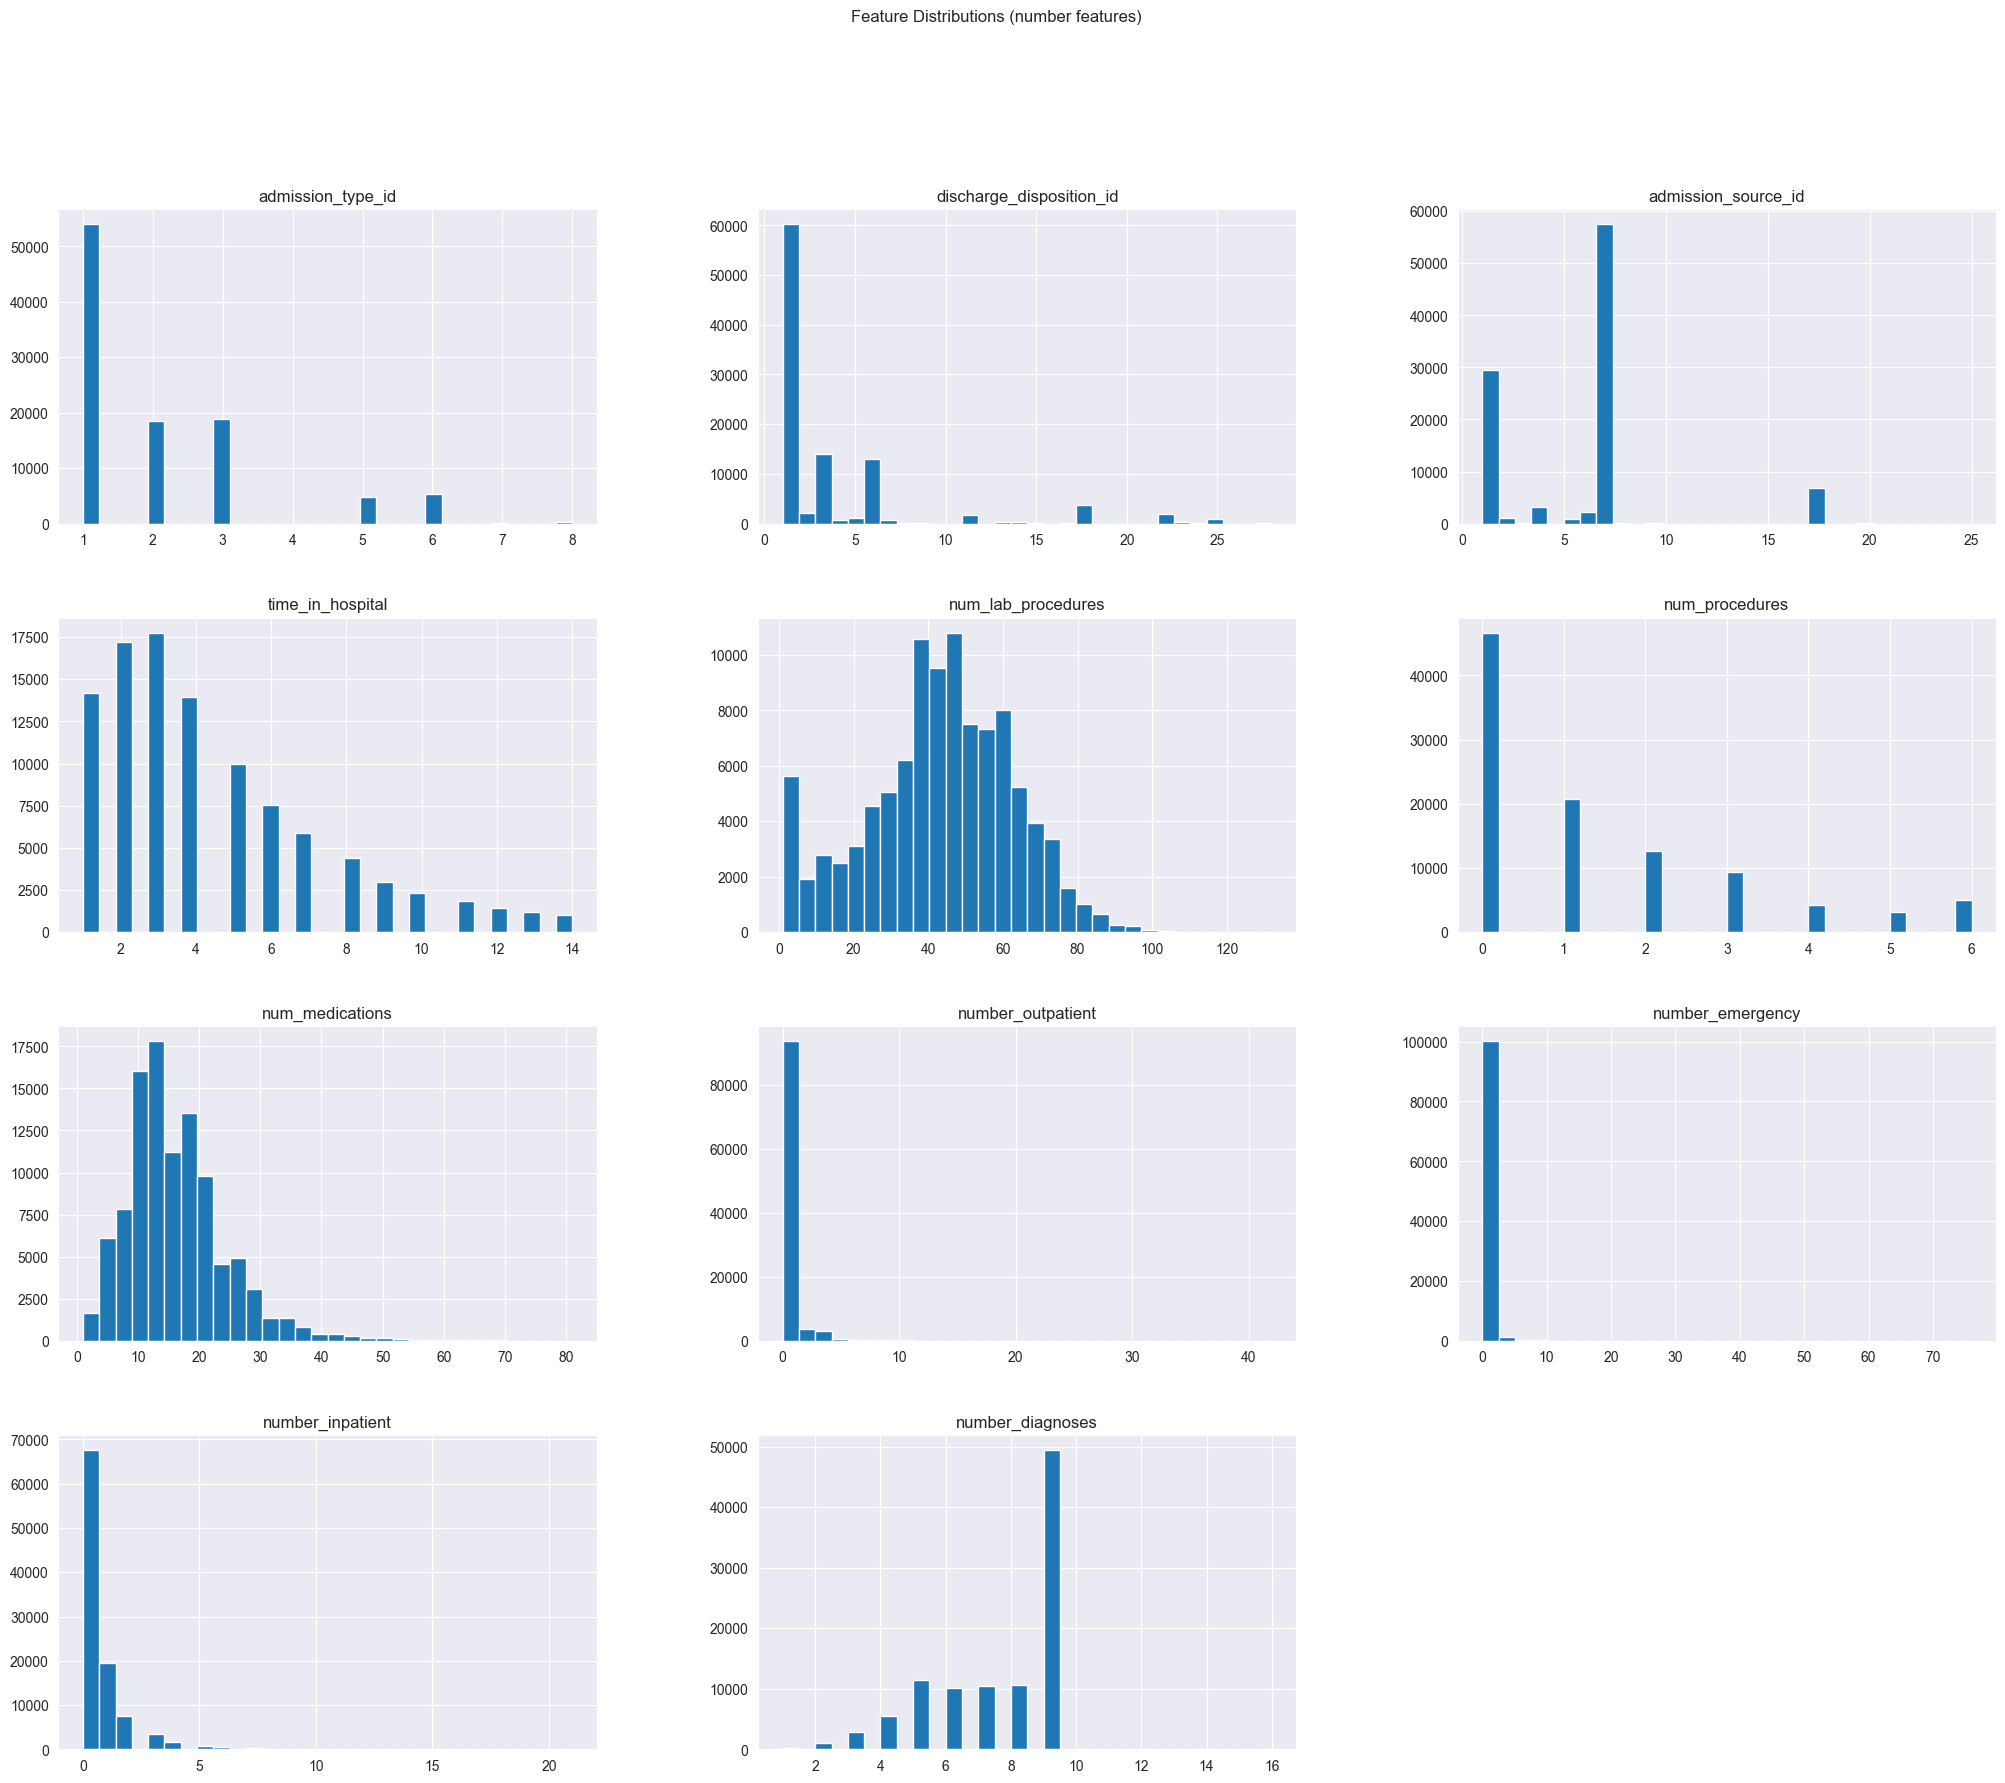

In [39]:
X.hist(figsize=(25, 20), bins=30)
plt.suptitle('Feature Distributions (number features)')
plt.show()

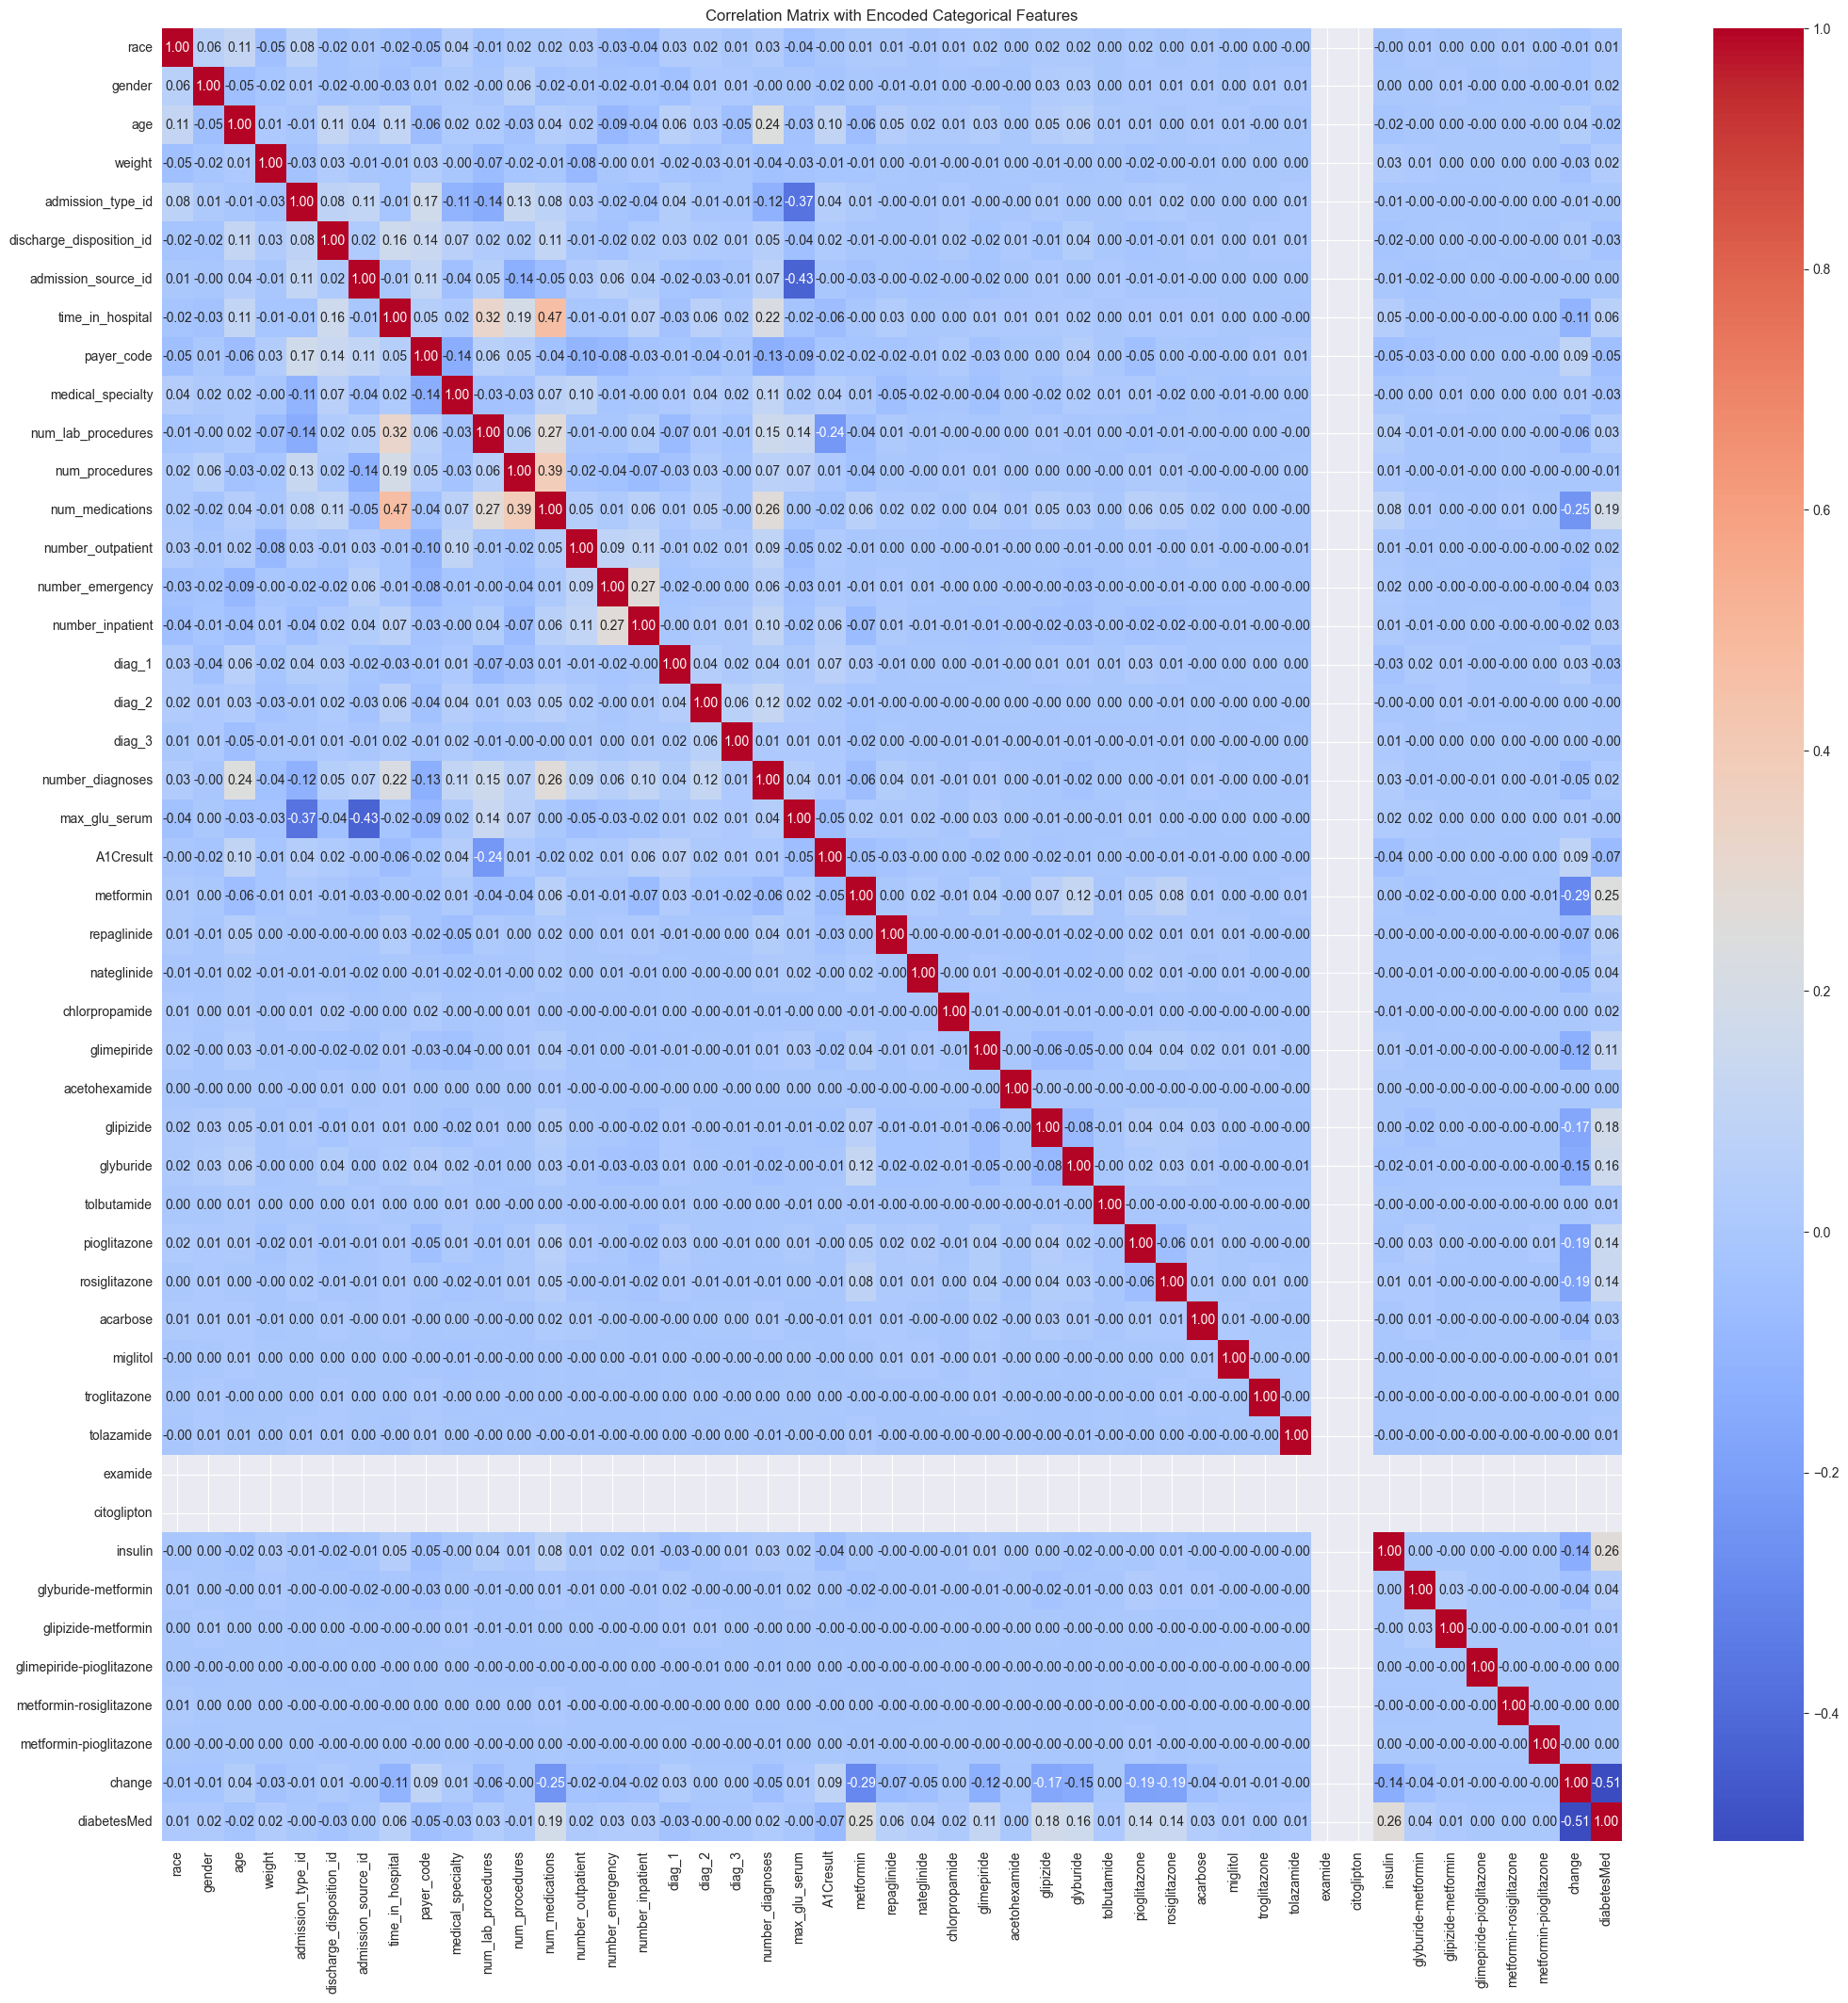

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
X_encoded = X.copy()

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

# Plot the correlation matrix on the encoded data
plt.figure(figsize=(25, 25))
sns.heatmap(X_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Categorical Features')
plt.show()


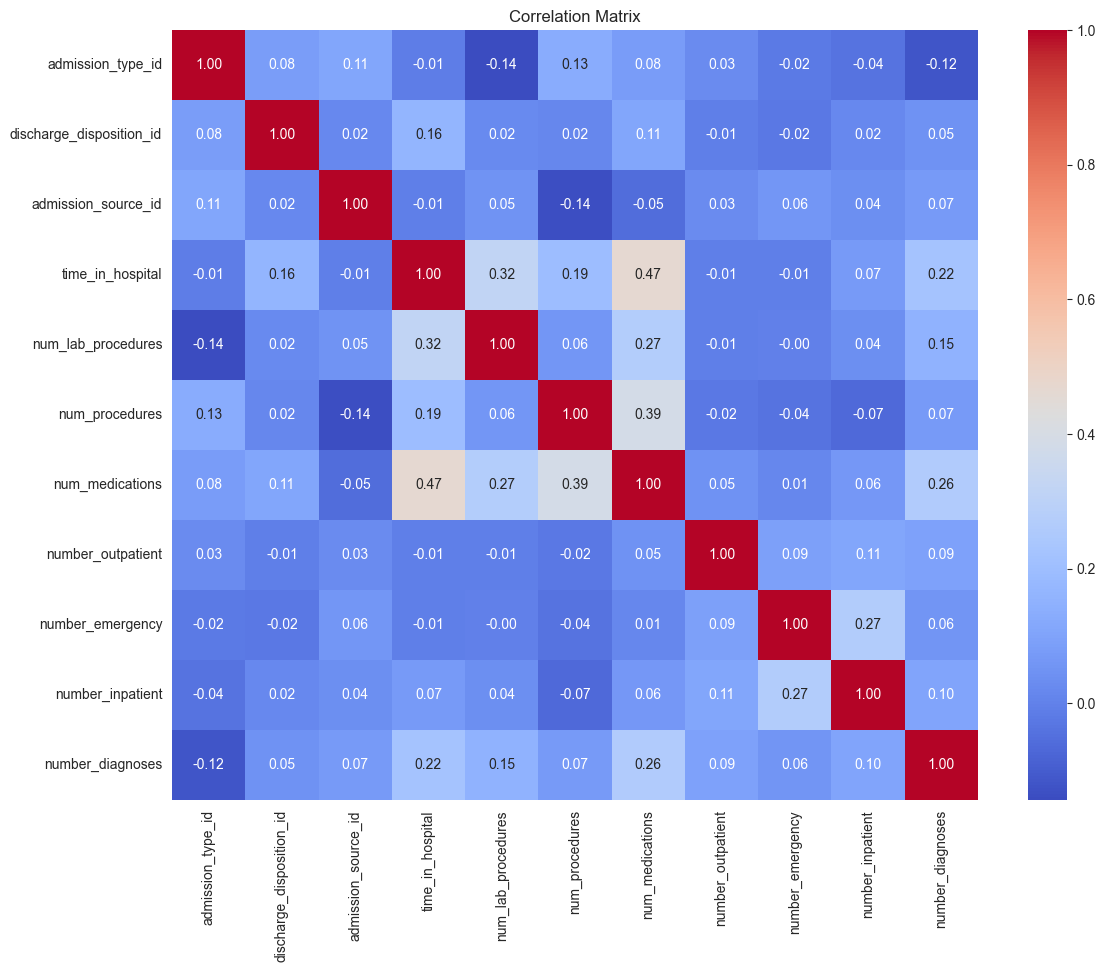

In [41]:
# Select only numeric columns
numeric_columns = X.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix
plt.figure(figsize=(13, 10))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

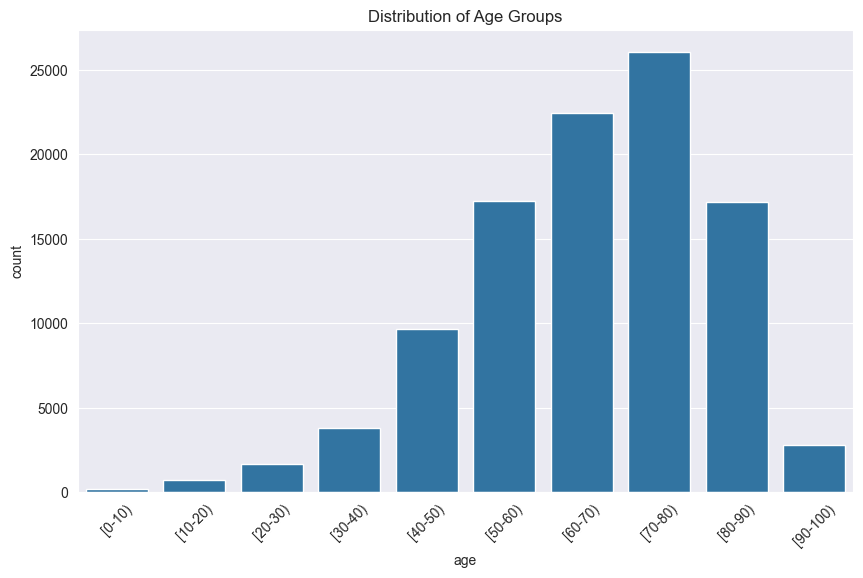

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=X)
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

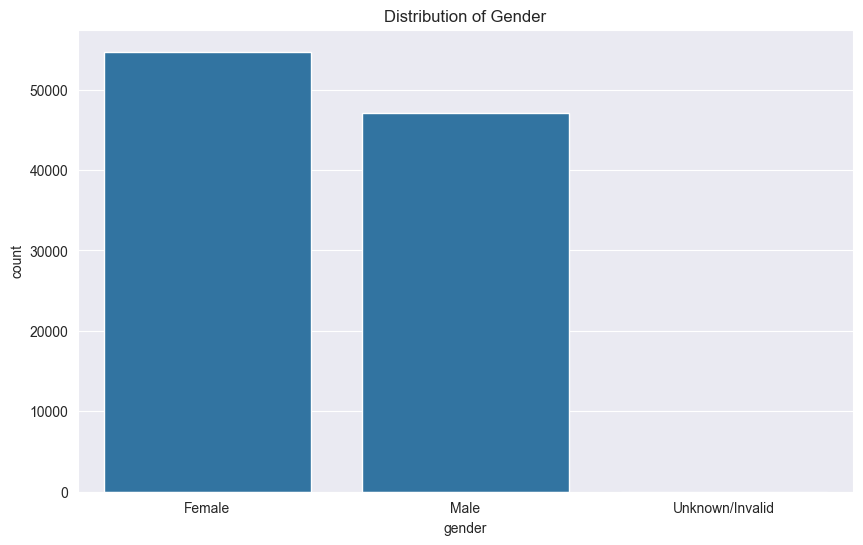

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=X)
plt.title('Distribution of Gender')
plt.show()


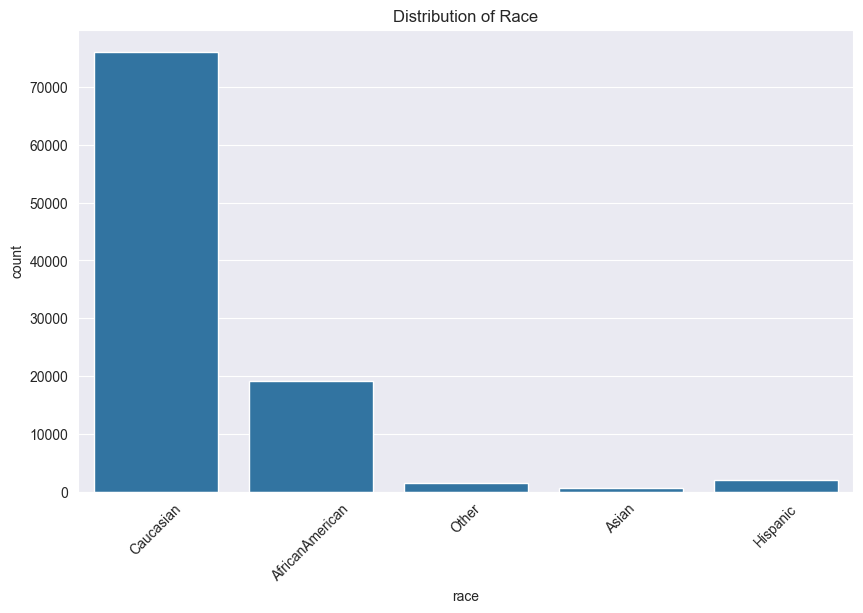

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=X)
plt.title('Distribution of Race')
plt.xticks(rotation=45)
plt.show()
# NONE values are left out

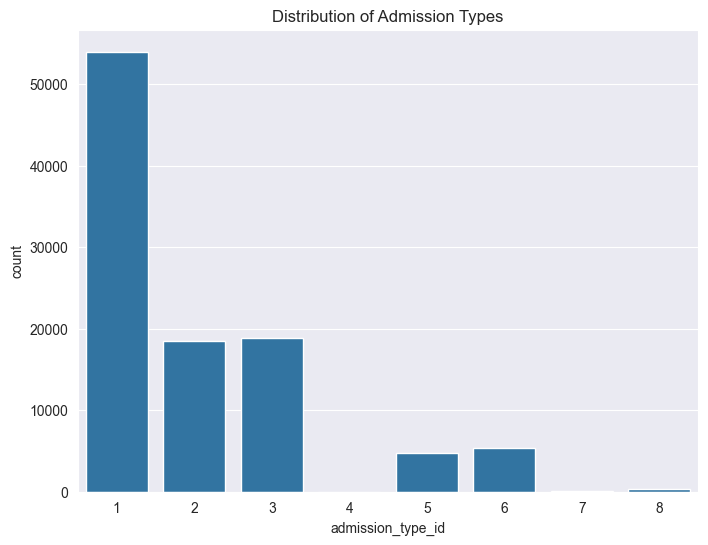

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='admission_type_id', data=X)
plt.title('Distribution of Admission Types')
plt.show()

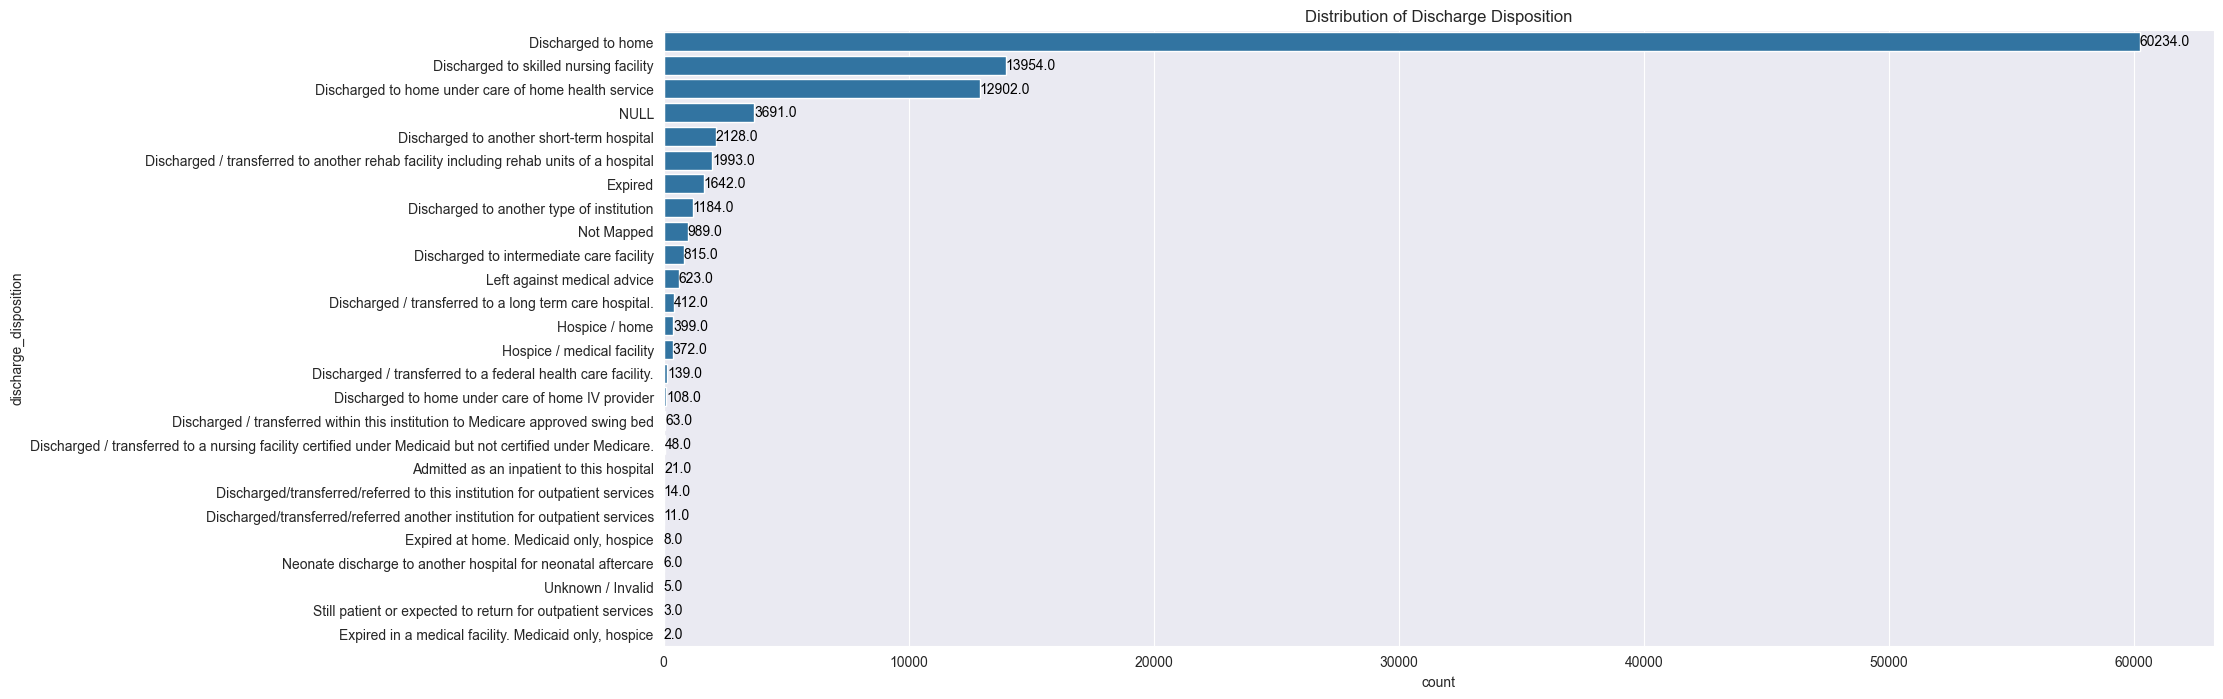

In [46]:
discharge_mapping = {
    1: 'Discharged to home',
    2: 'Discharged to another short-term hospital',
    3: 'Discharged to skilled nursing facility',
    4: 'Discharged to intermediate care facility',
    5: 'Discharged to another type of institution',
    6: 'Discharged to home under care of home health service',
    7: 'Left against medical advice',
    8: 'Discharged to home under care of home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharge to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged / transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: 'Expired at home. Medicaid only, hospice',
    20: 'Expired in a medical facility. Medicaid only, hospice',
    21: 'Expired, place unknown. Medicaid only, hospice',
    22: 'Discharged / transferred to another rehab facility including rehab units of a hospital',
    23: 'Discharged / transferred to a long term care hospital.',
    24: 'Discharged / transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    27: 'Unknown / Invalid',
    28: 'Discharged / transferred to a federal health care facility.',
    29: 'Discharged / transferred / referred to a psychiatric hospital or psychiatric distinct part unit of a hospital',
    30: 'Discharged / transferred to another Type of Health Care Institution not Defined Elsewhere'
}

X = X.copy()
X['discharge_disposition'] = X['discharge_disposition_id'].map(discharge_mapping)

plt.figure(figsize=(20, 8))
ax = sns.countplot(y='discharge_disposition', data=X, order=X['discharge_disposition'].value_counts().index)
plt.title('Distribution of Discharge Disposition')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                ha='left',
                va='center',
                color='black',
                fontsize=10)

plt.show()

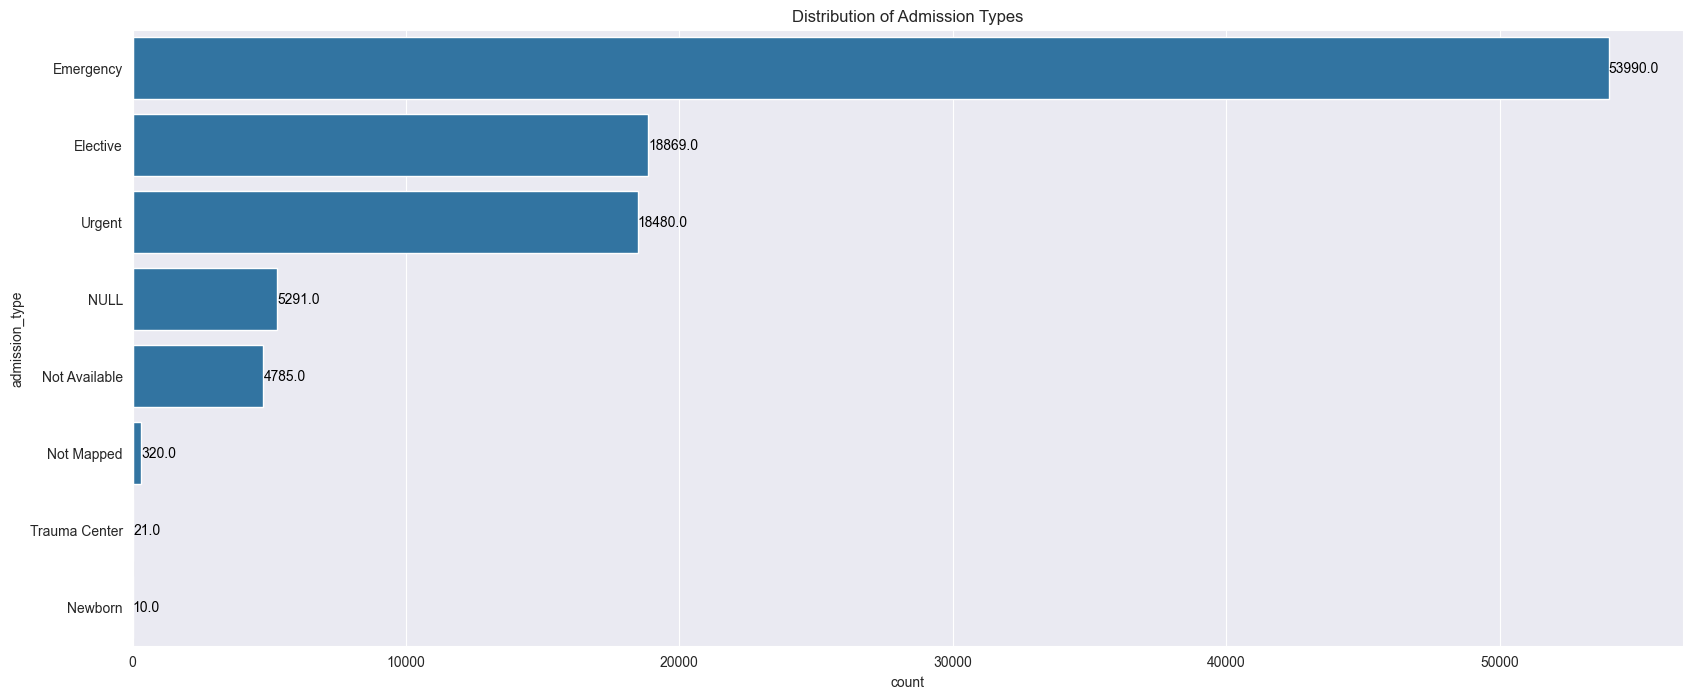

In [47]:
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped',
    9: 'Other'
}

X['admission_type'] = X['admission_type_id'].map(admission_type_mapping)

plt.figure(figsize=(20, 8))
ax1 = sns.countplot(y='admission_type', data=X, order=X['admission_type'].value_counts().index)
plt.title('Distribution of Admission Types')

for p in ax1.patches:
    ax1.annotate(f'{p.get_width()}',
                 (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                 ha='left',
                 va='center',
                 color='black',
                 fontsize=10)

plt.show()


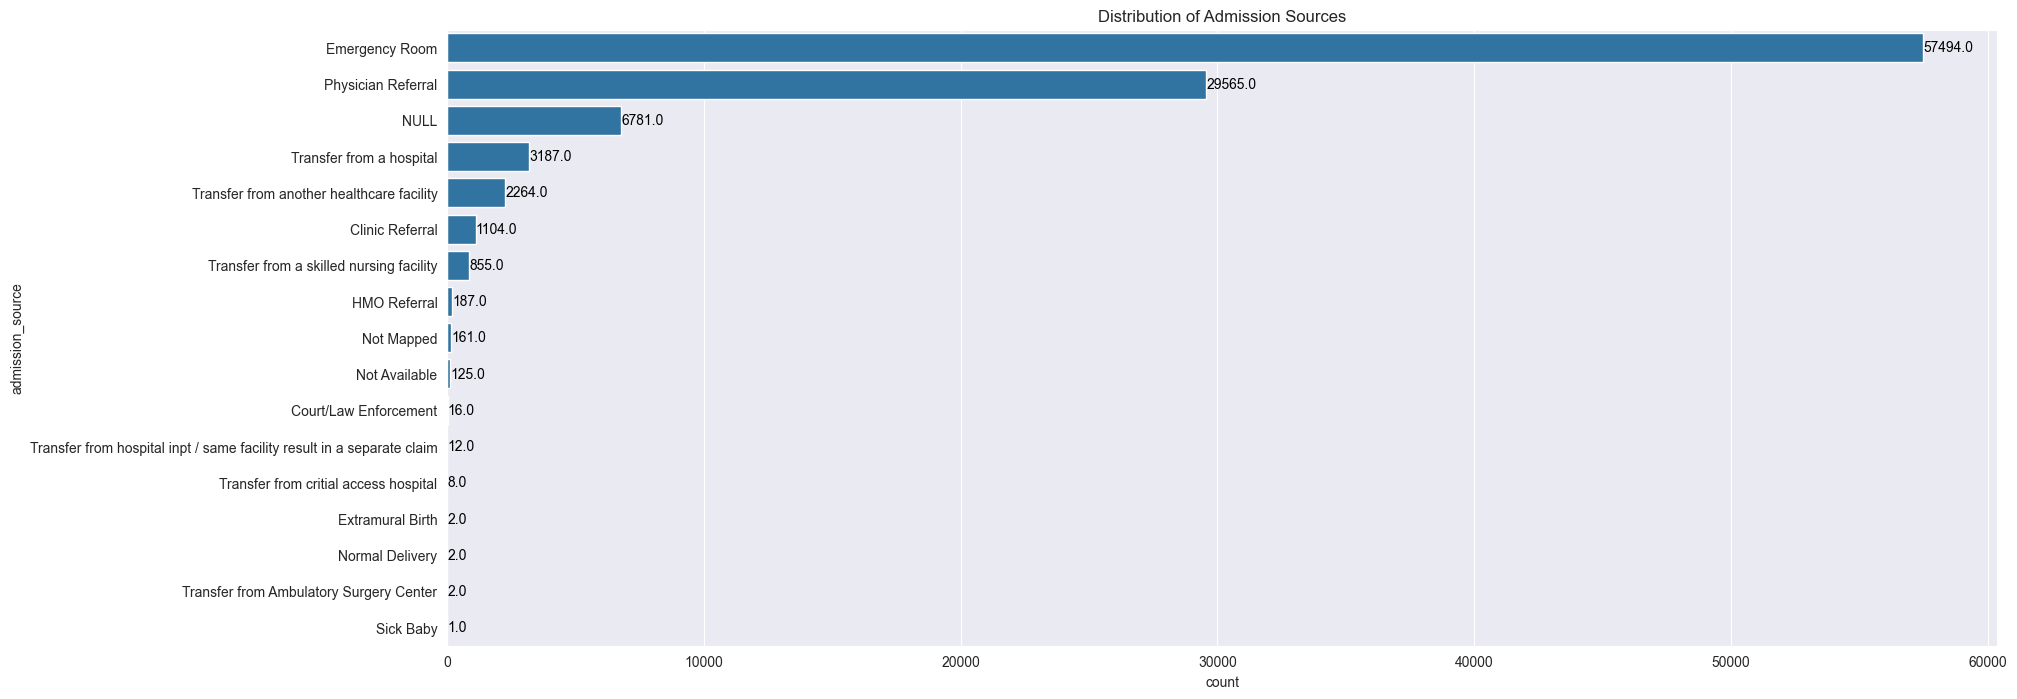

In [48]:
admission_source_mapping = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a skilled nursing facility',
    6: 'Transfer from another healthcare facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critial access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    16: 'Other',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown / Invalid',
    22: 'Transfer from hospital inpt / same facility result in a separate claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

X['admission_source'] = X['admission_source_id'].map(admission_source_mapping)

plt.figure(figsize=(20, 8))
ax2 = sns.countplot(y='admission_source', data=X, order=X['admission_source'].value_counts().index)
plt.title('Distribution of Admission Sources')

for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}',
                 (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                 ha='left',
                 va='center',
                 color='black',
                 fontsize=10)

plt.show()

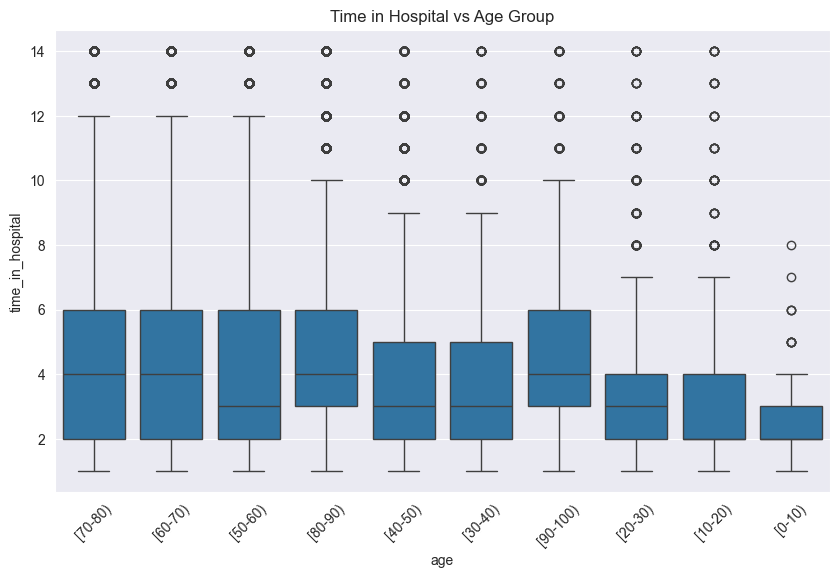

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='time_in_hospital', data=X, order=X['age'].value_counts().index)
plt.title('Time in Hospital vs Age Group')
plt.xticks(rotation=45)
plt.show()


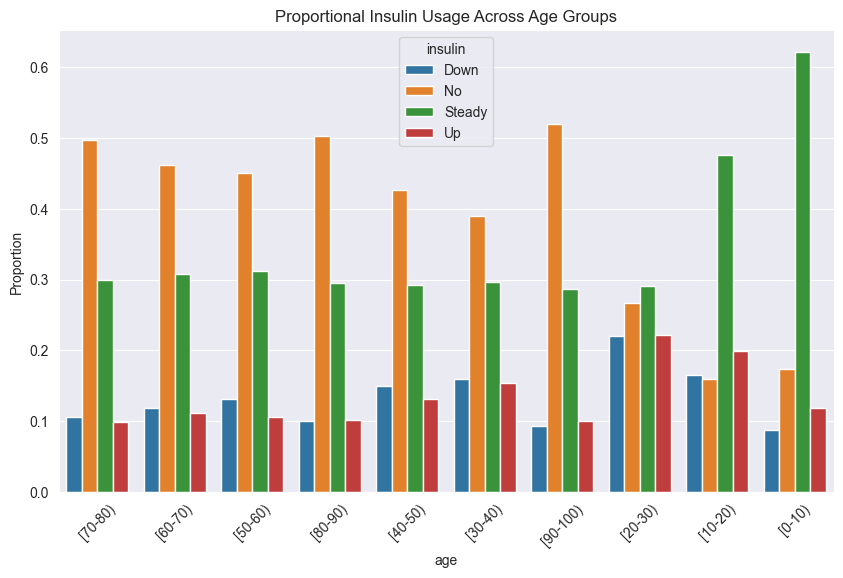

In [50]:
age_insulin_counts = X.groupby(['age', 'insulin']).size().reset_index(name='counts')
age_totals = X['age'].value_counts().reset_index()
age_totals.columns = ['age', 'total']
age_insulin_proportions = pd.merge(age_insulin_counts, age_totals, on='age')
age_insulin_proportions['proportion'] = age_insulin_proportions['counts'] / age_insulin_proportions['total']

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='proportion', hue='insulin', data=age_insulin_proportions, order=X['age'].value_counts().index)
plt.title('Proportional Insulin Usage Across Age Groups')
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

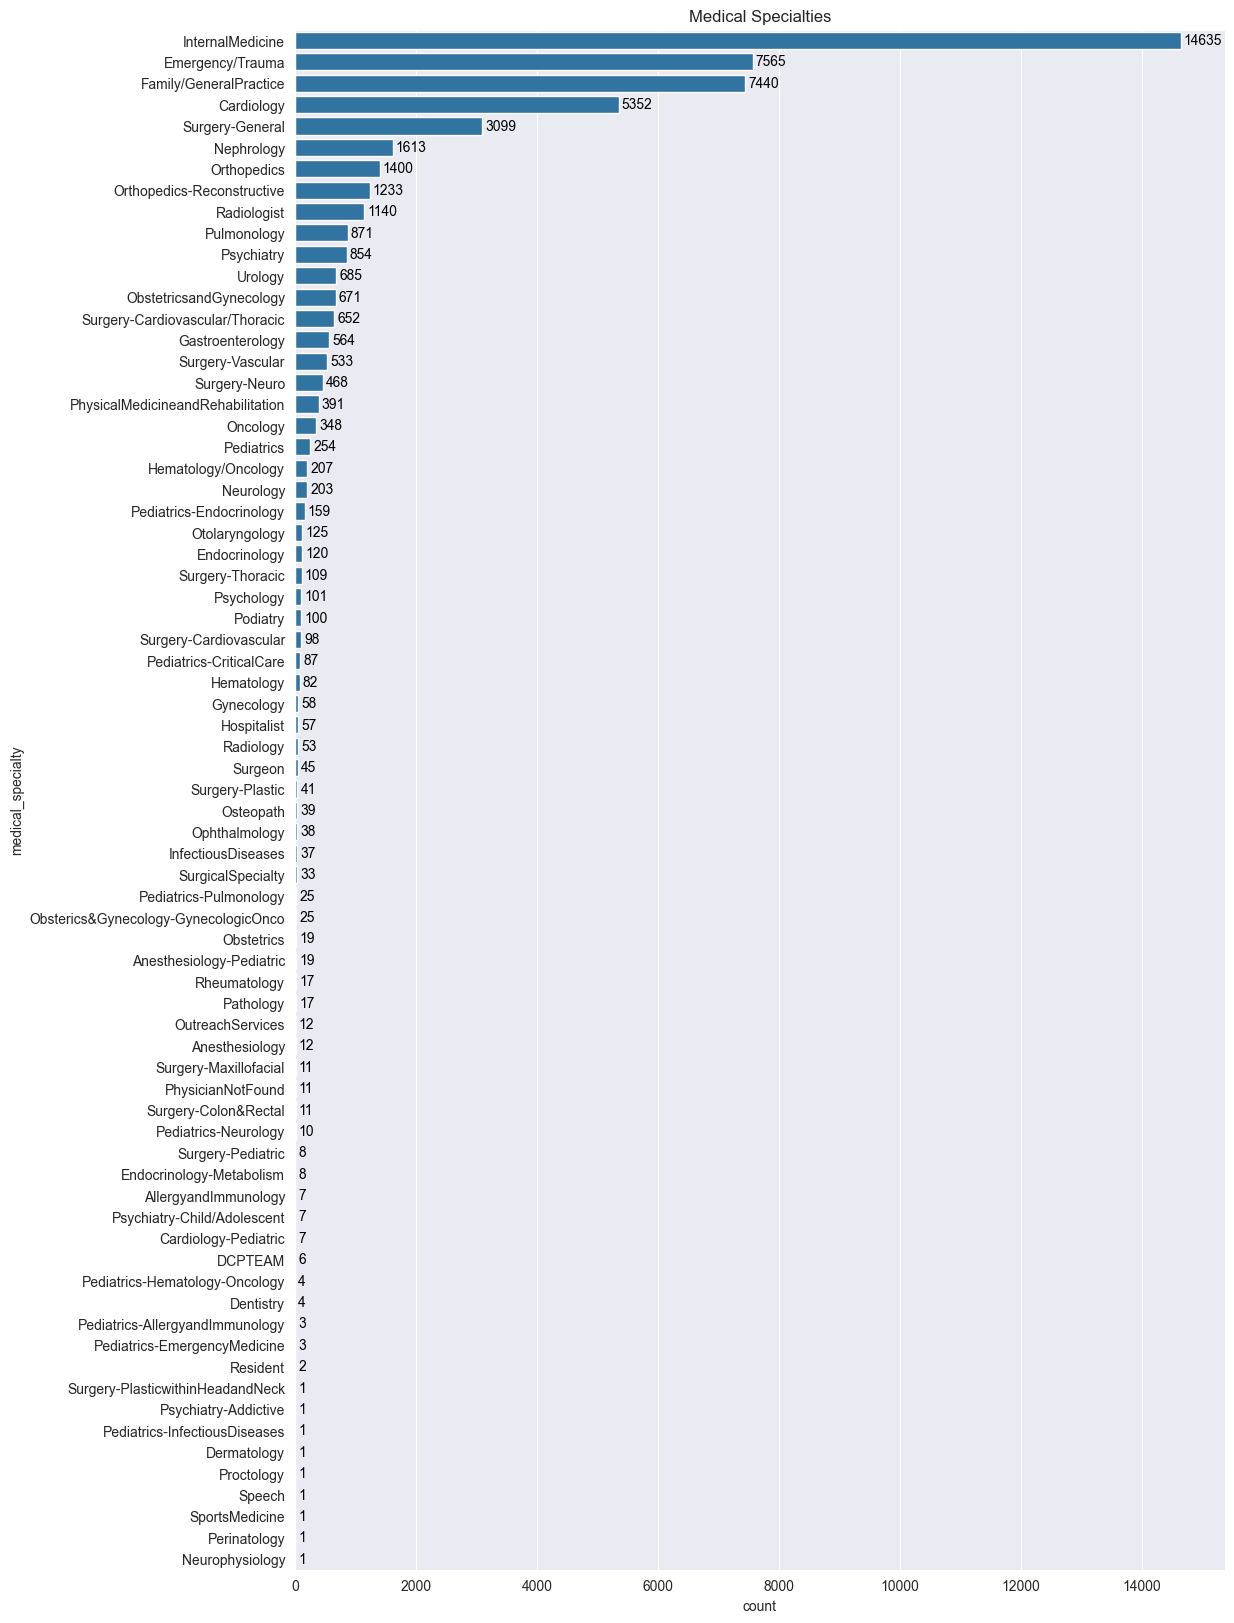

In [51]:
plt.figure(figsize=(12, 20))
ax = sns.countplot(y='medical_specialty', data=X, order=X['medical_specialty'].value_counts().index)
plt.title('Medical Specialties')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width() + 50, p.get_y() + p.get_height() / 2),
                ha='left',
                va='center',
                color='black',
                fontsize=10)

plt.show()



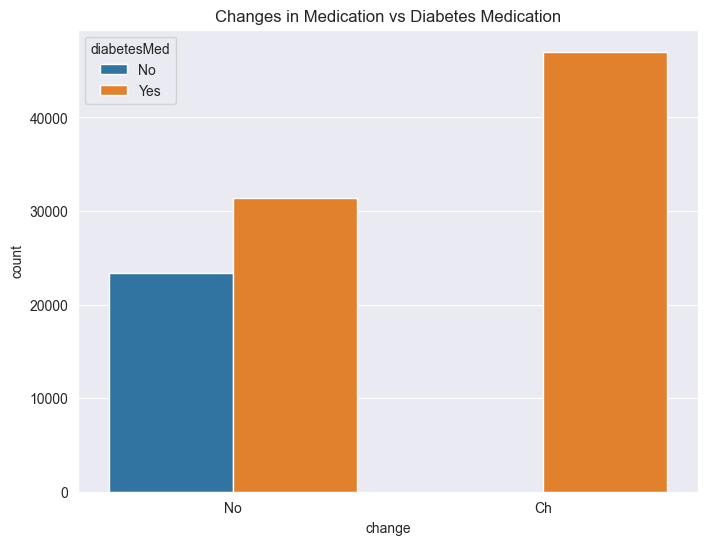

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='change', hue='diabetesMed', data=X)
plt.title('Changes in Medication vs Diabetes Medication')
plt.show()


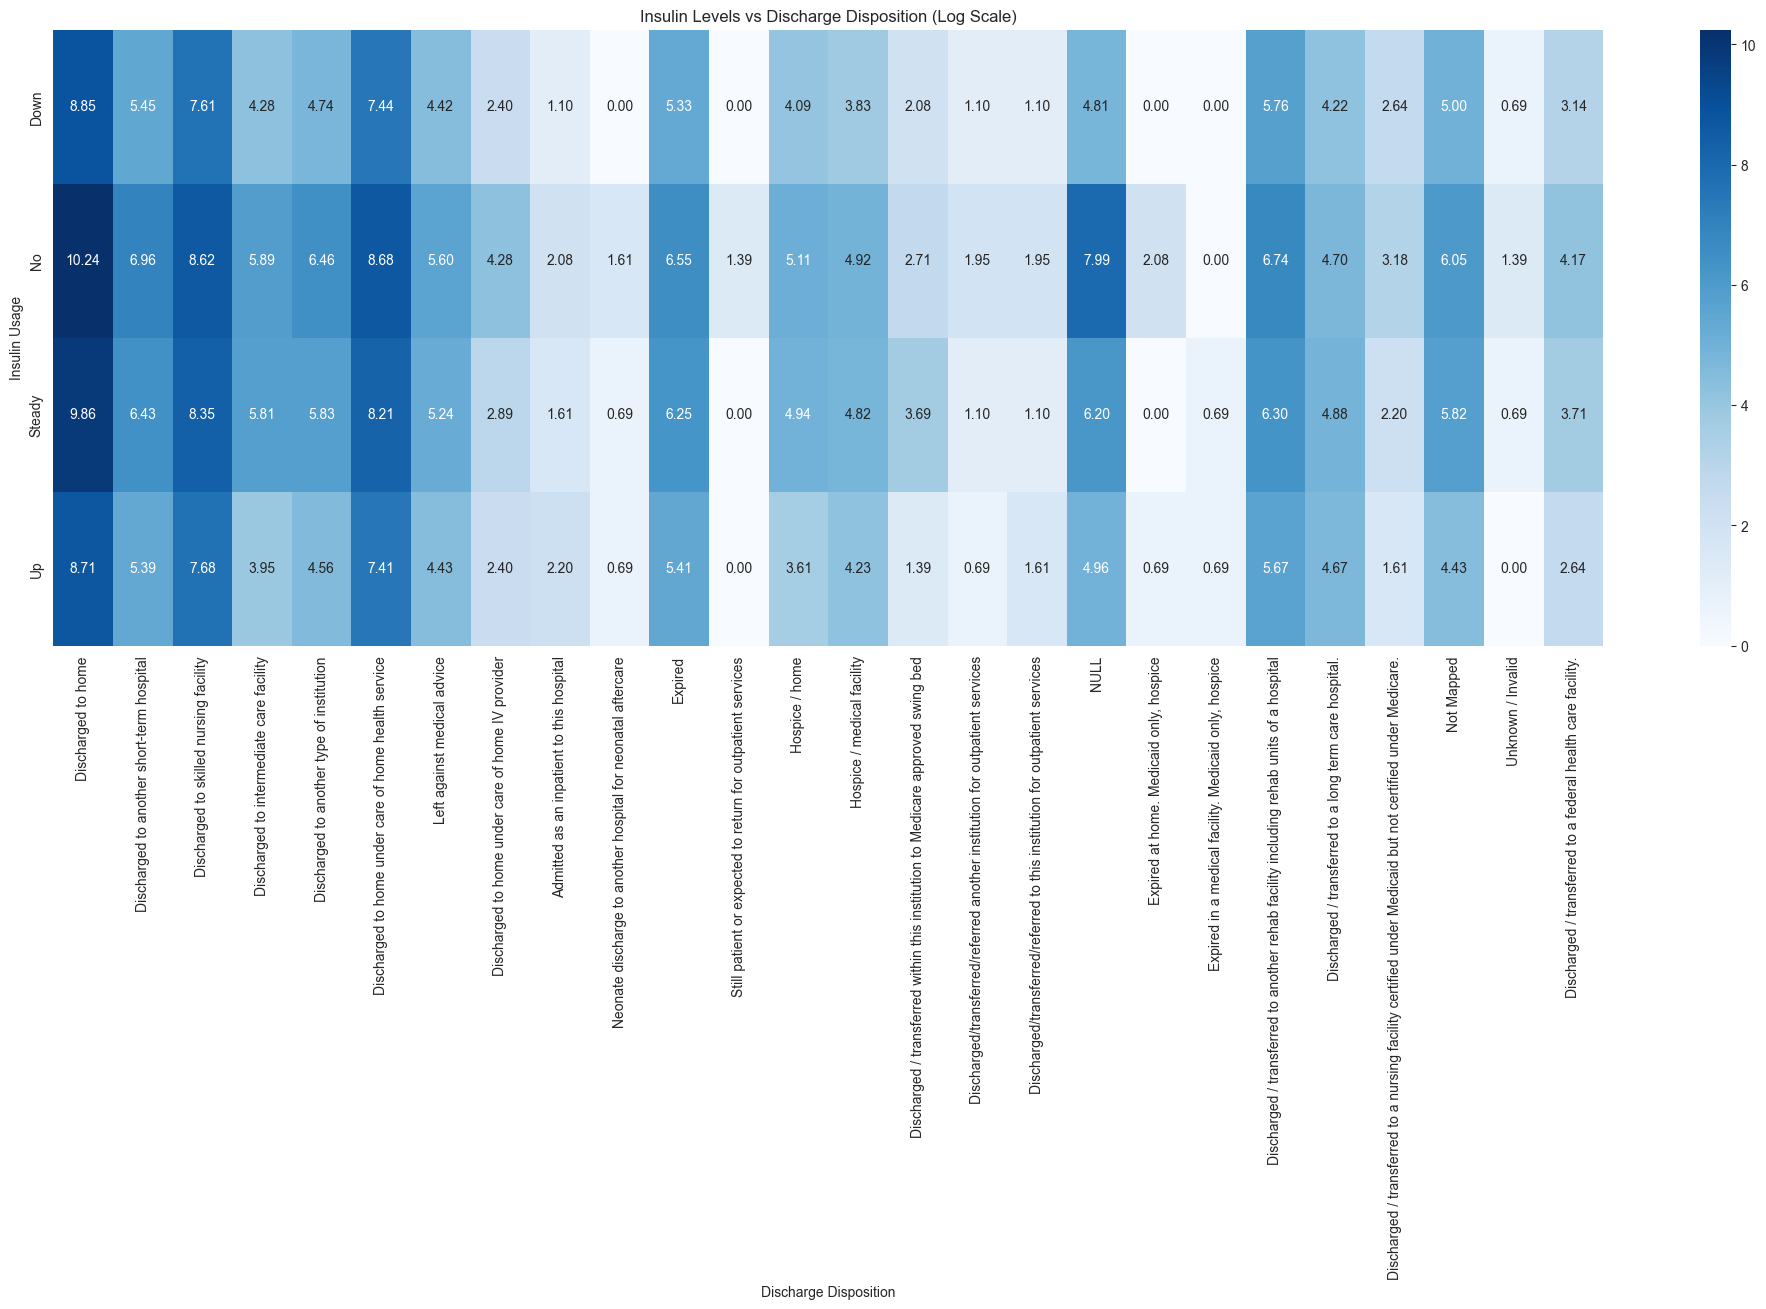

In [53]:
# Create the crosstab of insulin and discharge disposition
insulin_discharge = pd.crosstab(X['insulin'], X['discharge_disposition_id'])

# Rename columns using the discharge_mapping
insulin_discharge.columns = [discharge_mapping.get(col, col) for col in insulin_discharge.columns]

# Apply a logarithmic transformation to the values
# Use np.log1p to handle zero values (log(0) is undefined)
import numpy as np
log_insulin_discharge = np.log1p(insulin_discharge)

# Heatmap of insulin vs discharge disposition with logarithmic scale
plt.figure(figsize=(25, 8))
sns.heatmap(log_insulin_discharge, annot=True, fmt='.2f', cmap='Blues')
plt.title('Insulin Levels vs Discharge Disposition (Log Scale)')
plt.xlabel('Discharge Disposition')
plt.ylabel('Insulin Usage')
plt.show()


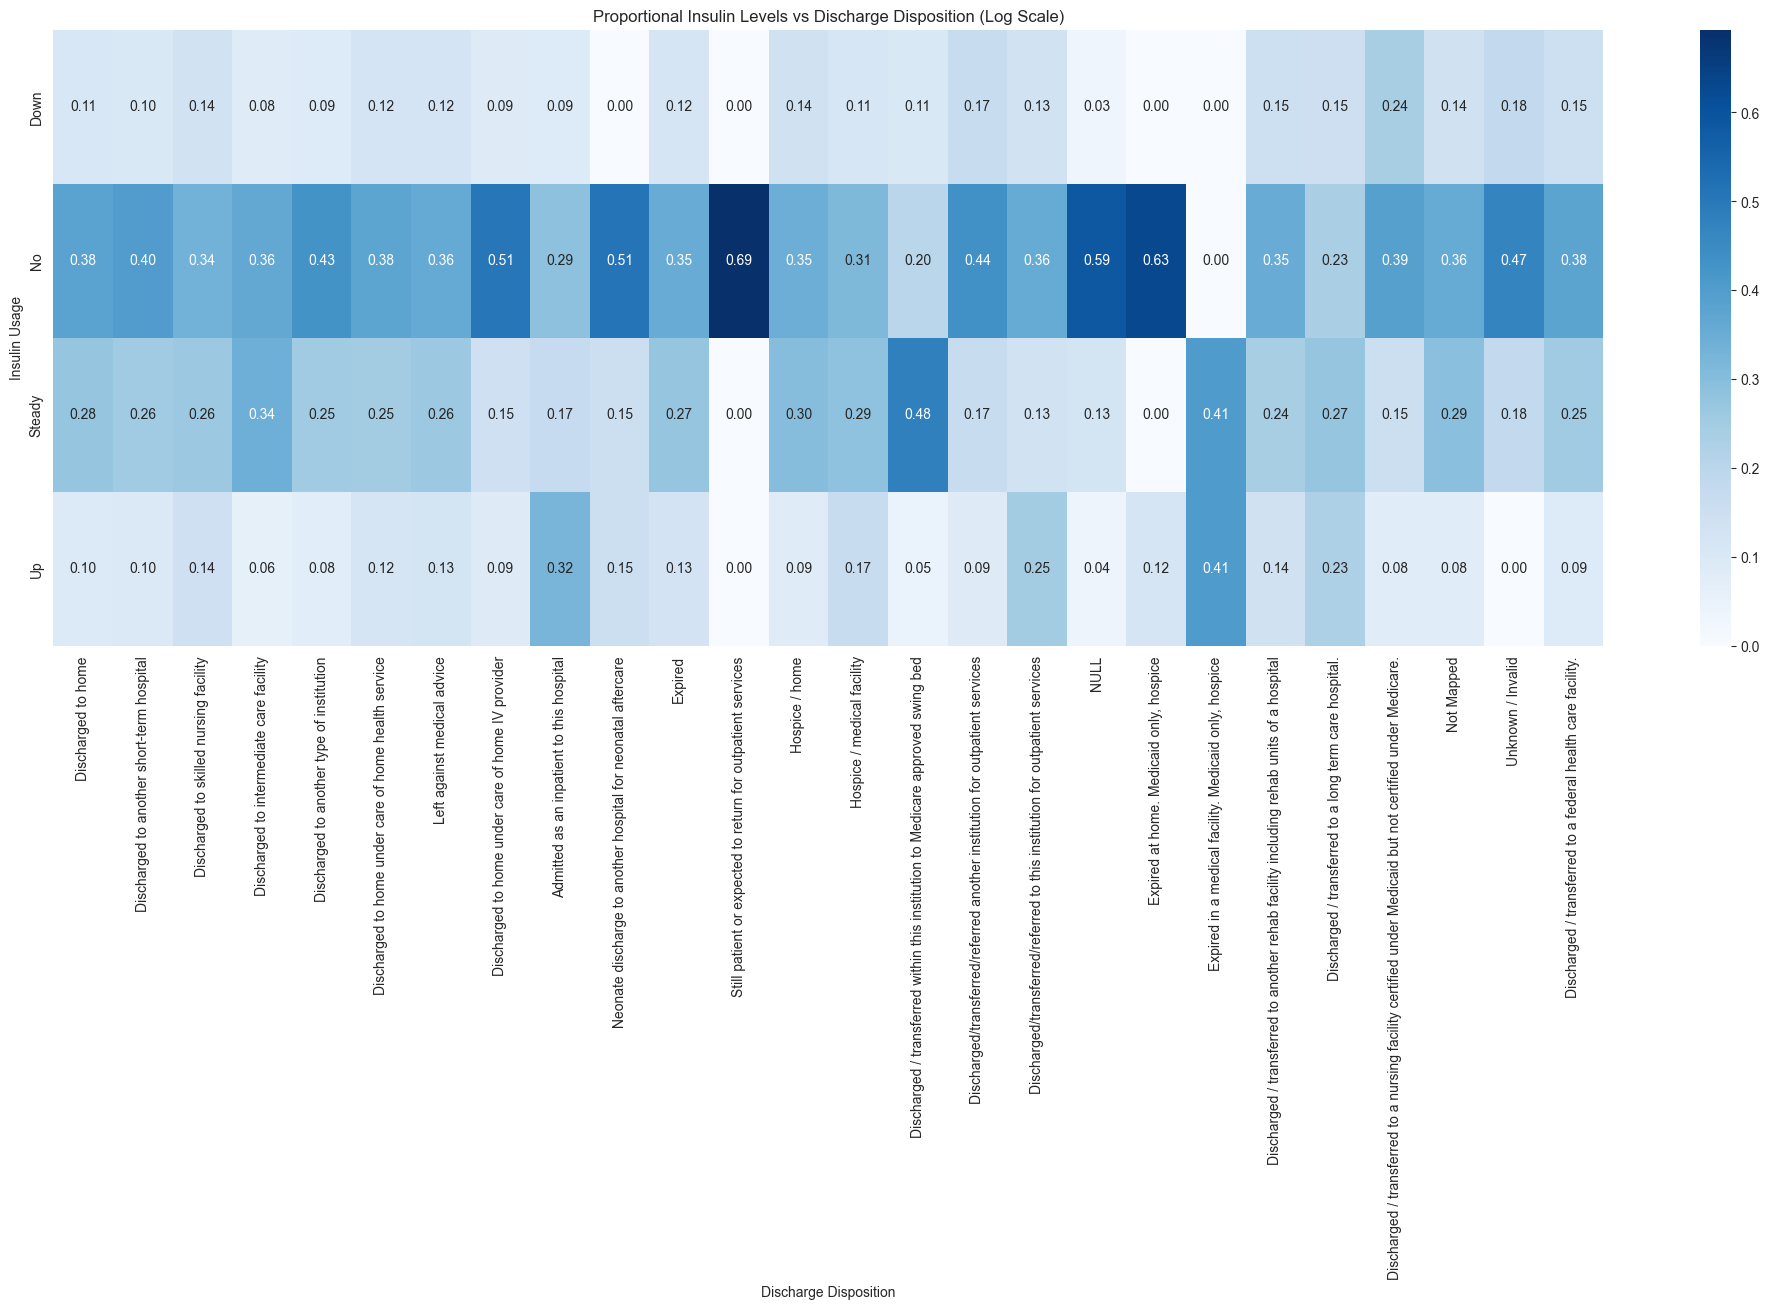

In [54]:
# Create the crosstab of insulin and discharge disposition
insulin_discharge = pd.crosstab(X['insulin'], X['discharge_disposition_id'])

# Rename columns using the discharge_mapping
insulin_discharge.columns = [discharge_mapping.get(col, col) for col in insulin_discharge.columns]

# Normalize by the total for each discharge disposition
insulin_discharge_normalized = insulin_discharge.div(insulin_discharge.sum(axis=0), axis=1)

# Apply a logarithmic transformation to the normalized values
import numpy as np
log_insulin_discharge = np.log1p(insulin_discharge_normalized)

# Heatmap of insulin vs discharge disposition with normalized values on logarithmic scale
plt.figure(figsize=(25, 8))
sns.heatmap(log_insulin_discharge, annot=True, fmt='.2f', cmap='Blues')
plt.title('Proportional Insulin Levels vs Discharge Disposition (Log Scale)')
plt.xlabel('Discharge Disposition')
plt.ylabel('Insulin Usage')
plt.show()


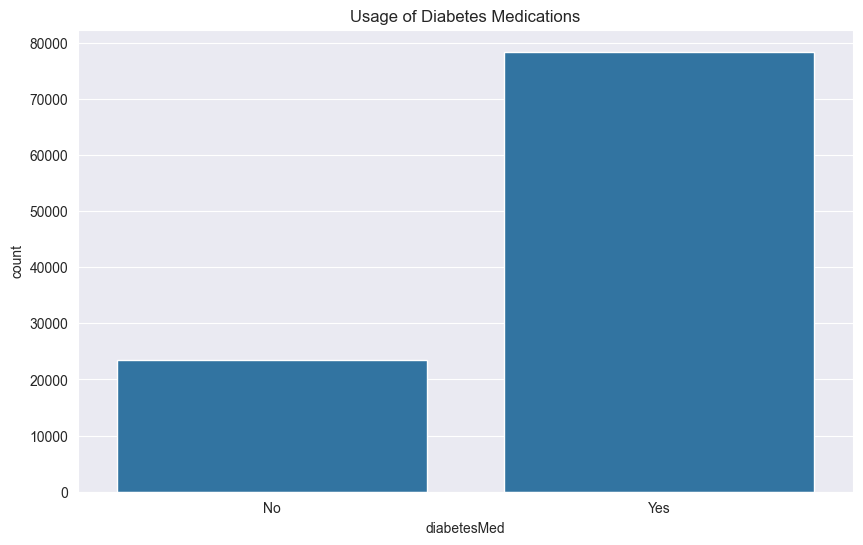

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', data=X)
plt.title('Usage of Diabetes Medications')
plt.show()


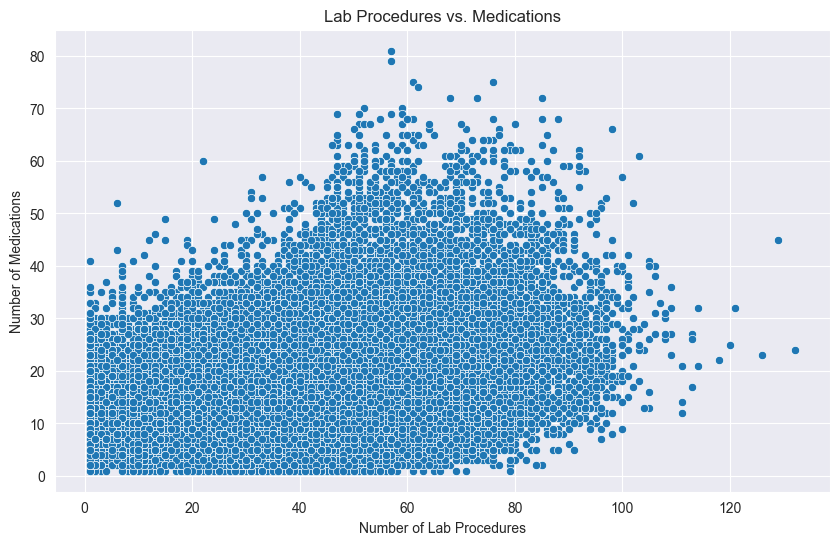

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_lab_procedures', y='num_medications', data=X)
plt.title('Lab Procedures vs. Medications')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.show()


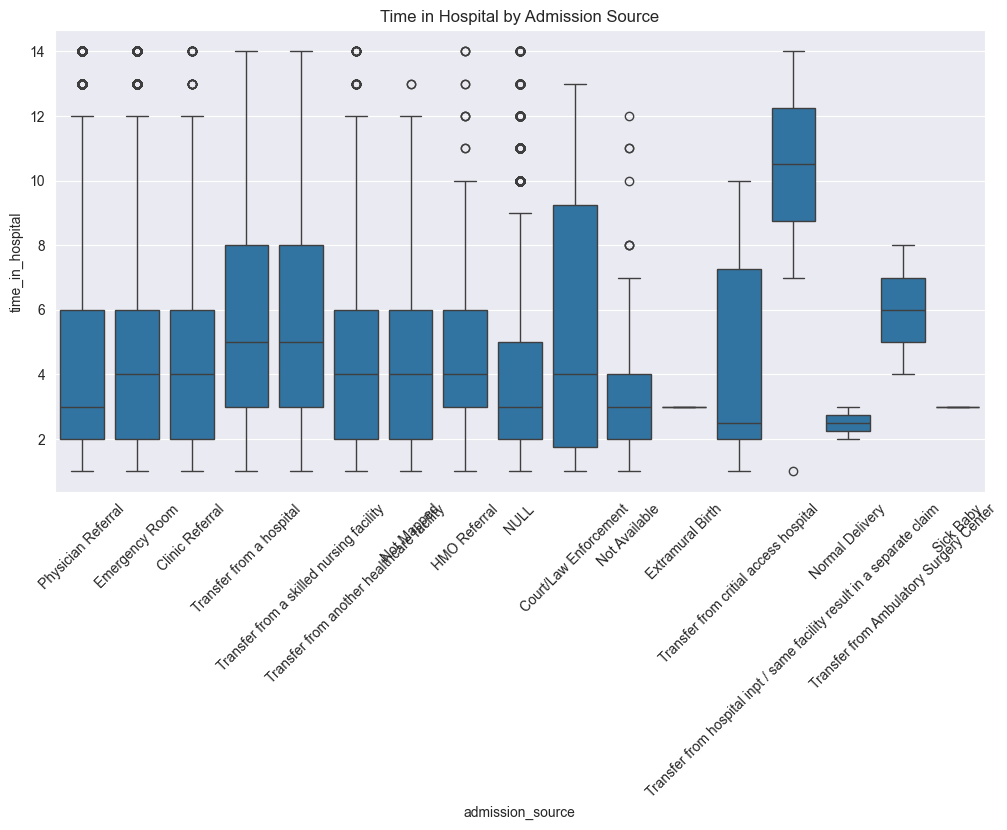

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='admission_source', y='time_in_hospital', data=X)
plt.title('Time in Hospital by Admission Source')
plt.xticks(rotation=45)
plt.show()
